Got my dataset from:
https://www.kaggle.com/alessiocorrado99/animals10

Project outline:
1. find images- done
2. turn images into usable data set/array - done
3. split into training and testing - done
4. make training algorithm - done
5. fix it
5. if works then done with main project
5. make some type of model?
6. try with video?

In [1]:
import tensorflow as tf

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Activation, Dense, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import log_loss
from keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from load_data import load_data, load_resized_data
import numpy as np
import os
from os.path import join
import time


Using TensorFlow backend.


In [5]:
import matplotlib.pyplot as plt

In [7]:
img = plt.imread(join("images", "dog", "OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg"))

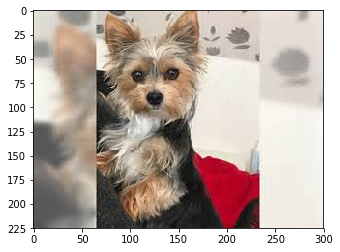

In [8]:
plt.imshow(img)

In [19]:
X_train, X_valid, Y_train, Y_valid = load_resized_data(150,150)

['cat', 'dog']
------------------------------
Creating training images...
------------------------------
Loading done.


In [66]:
num_classes = 2
channel = 3 #RGB
batch_size = 16
num_epoch = 4

In [70]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_53 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_54 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 34, 34, 64)        18496     
__________

In [71]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
t=time.time()
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, 
                     shuffle=False, validation_data= (X_valid,Y_valid))
#compute the training time
print('Training time: %s' % (time.time()-t))

Train on 16228 samples, validate on 4058 samples
Epoch 1/4
13248/16228 [=======================>......] - ETA: 56s - loss: 8.0973 - acc: 0.4975

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)